In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [103]:
#Target Values
bikes['total'] = bikes['casual'] + bikes['registered']


#Drop unwanted columns

bikes = bikes.drop(columns=['casual', 'registered', 'dteday'])

#Engineered features
def add_engineered_features(df):
    df = df.copy()
    df['is_morning'] = df['hr'].between(6, 11).astype(int)
    df['is_evening'] = df['hr'].between(17, 20).astype(int)
    df['temp_diff'] = df['feels_like_c'] - df['temp_c']
    df['is_bad_weather'] = df['weathersit'].isin([3, 4]).astype(int)
    df['is_work_time'] = ((df['workingday'] == 1) & df['hr'].between(8, 18)).astype(int)
    df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    return df

bikes = add_engineered_features(bikes)

In [104]:

X = bikes.drop(columns=['total'])
y = bikes['total']

#Scale Features

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
#Train/test

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [106]:
#Define Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

#Compile the Model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
#Train the model

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=32,
    verbose=1
)

Epoch 1/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 85014.8438 - mae: 194.6904 - val_loss: 35967.1133 - val_mae: 122.2843
Epoch 2/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 34203.2539 - mae: 120.2791 - val_loss: 31866.8105 - val_mae: 116.1378
Epoch 3/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 30716.8711 - mae: 113.5146 - val_loss: 30446.3145 - val_mae: 111.8828
Epoch 4/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 29516.6562 - mae: 110.4047 - val_loss: 29721.6582 - val_mae: 112.2056
Epoch 5/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 28722.6367 - mae: 108.7866 - val_loss: 28330.8867 - val_mae: 107.9716
Epoch 6/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 27990.5762 - mae: 107.7483 - val_loss: 27696.9414 - val_mae: 107.0608
Epoch 7/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 27280.0254 - mae: 106.0716 - val_loss: 26956.8184 - val_mae: 105.2734
Epoch 8/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 26765.4980 -

In [108]:
 # Make predictions
predictions = model.predict(X_test).flatten()

# Calculate metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print results
print(f"Test R² Score: {r2:.3f}")
print(f"Test MAE: {mae:.2f}")

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test R² Score: 0.783
Test MAE: 101.54


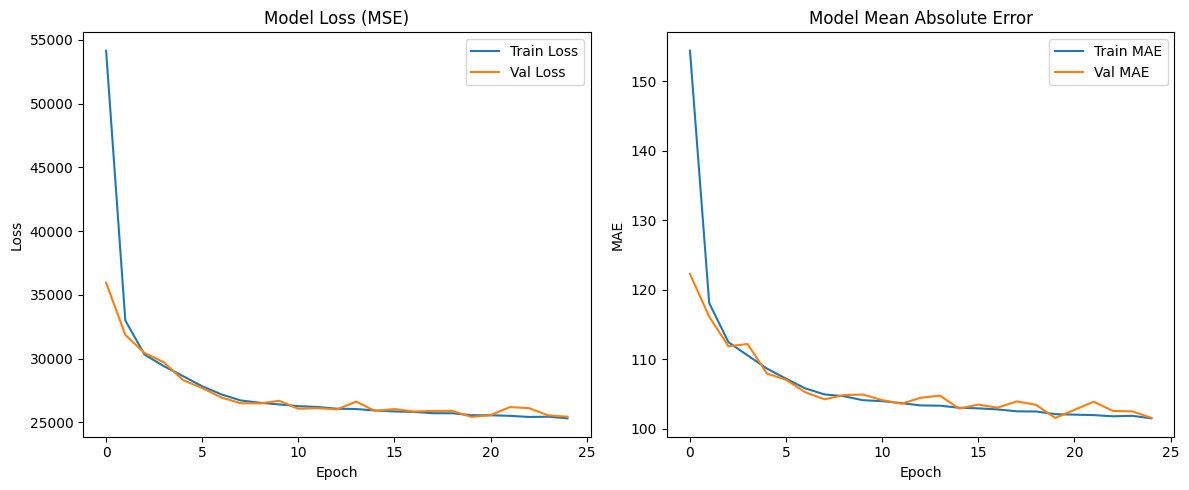

In [110]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [111]:
from sklearn.metrics import r2_score, mean_absolute_error

# Step 1: Load holdout features and actual target values
mini_holdout_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv"
mini_targets_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini_answers.csv"

mini_holdout = pd.read_csv(mini_holdout_url)
mini_targets = pd.read_csv(mini_targets_url)

# Step 2: Drop columns not used in training
mini_holdout = mini_holdout.drop(columns=['dteday'])

# Step 3: Apply the same feature engineering used during training
def add_engineered_features(df):
    df = df.copy()
    df['is_morning'] = df['hr'].between(6, 11).astype(int)
    df['is_evening'] = df['hr'].between(17, 20).astype(int)
    df['temp_diff'] = df['feels_like_c'] - df['temp_c']
    df['is_bad_weather'] = df['weathersit'].isin([3, 4]).astype(int)
    df['is_work_time'] = ((df['workingday'] == 1) & df['hr'].between(8, 18)).astype(int)
    df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    return df

mini_holdout = add_engineered_features(mini_holdout)

# Step 4: Ensure the holdout columns match training data
mini_holdout = mini_holdout[X.columns]  # use same column order as training

# Step 5: Scale the holdout features
mini_holdout_scaled = scaler.transform(mini_holdout)

# Step 6: Predict using your trained model
mini_predictions = model.predict(mini_holdout_scaled).flatten()

# Step 7: Get actual target values (casual + registered)
y_true = mini_targets['casual'] + mini_targets['registered']

# Step 8: Evaluate the model
r2 = r2_score(y_true, mini_predictions)
mae = mean_absolute_error(y_true, mini_predictions)

# Step 9: Print metrics
print(f"Mini Holdout R² Score: {r2:.3f}")
print(f"Mini Holdout MAE: {mae:.2f}")



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mini Holdout R² Score: 0.654
Mini Holdout MAE: 155.05


703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


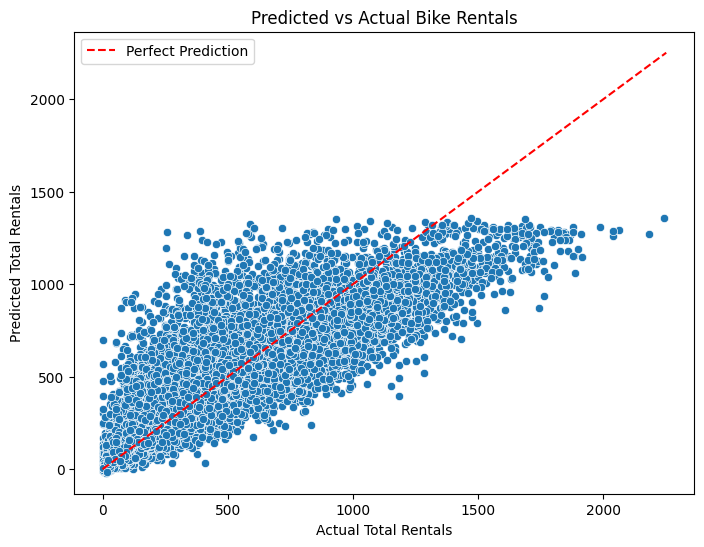

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test set
y_pred = model.predict(X_test).flatten()

# Create DataFrame of predictions vs actual
pred = pd.DataFrame({
    'predictions': y_pred,
    'actual': y_test.reset_index(drop=True)  # ensure same index
})

# Add a column for the difference
pred['difference'] = pred['actual'] - pred['predictions']

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
xlims = (0, max(pred['actual'].max(), pred['predictions'].max()) + 10)

ax = sns.scatterplot(data=pred, x='actual', y='predictions')
ax.plot(xlims, xlims, color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Total Rentals")
plt.ylabel("Predicted Total Rentals")
plt.title("Predicted vs Actual Bike Rentals")
plt.legend()
plt.show()


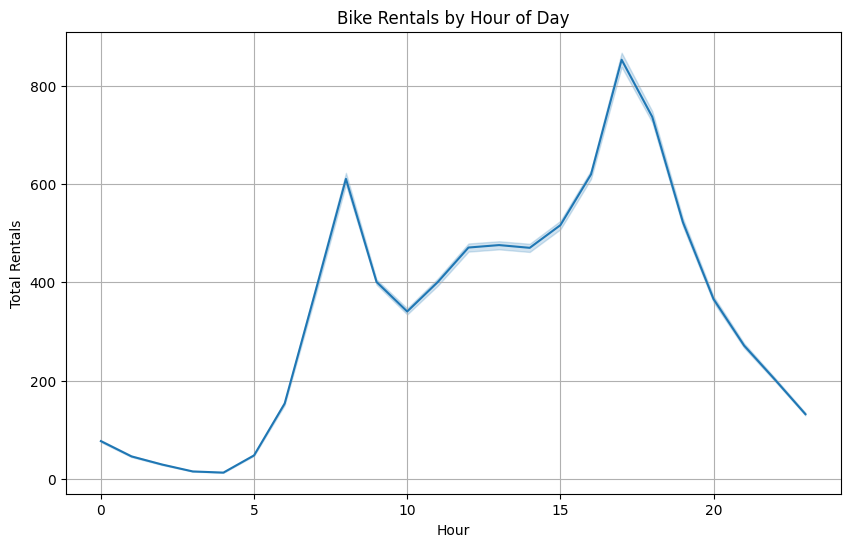

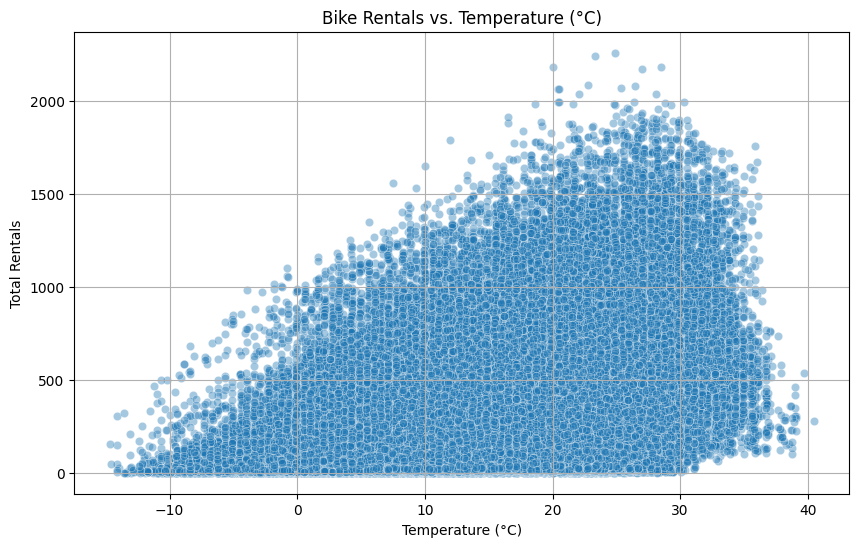

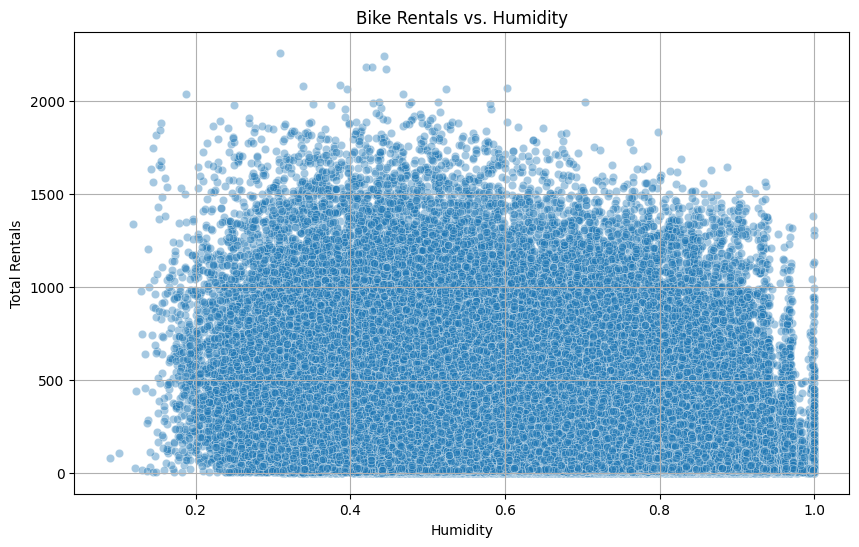

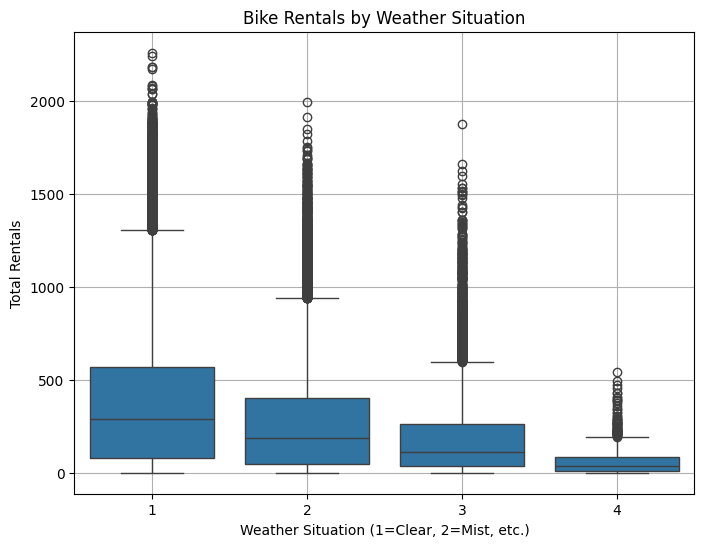

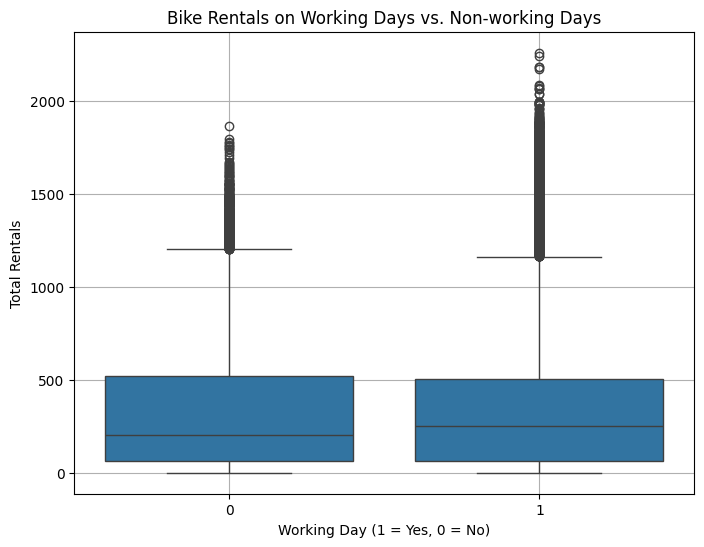

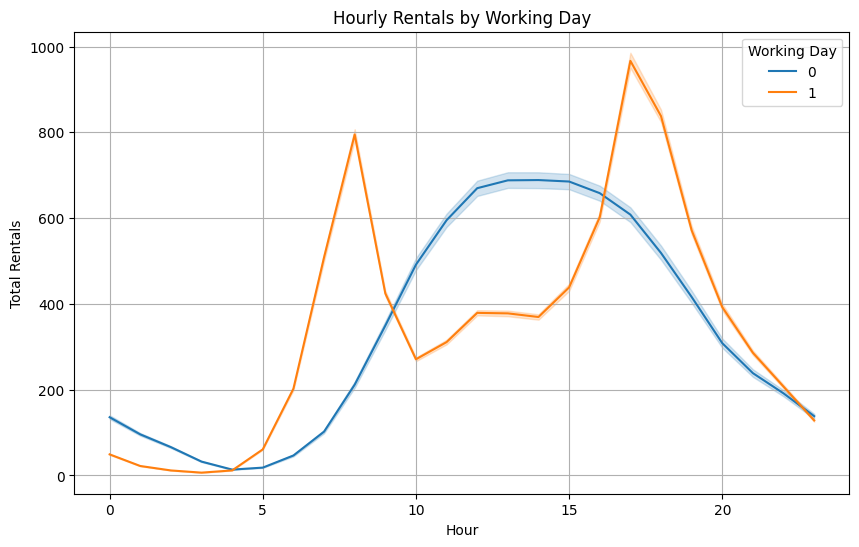

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
#Bike Rentals By Hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=bikes, x='hr', y='total')
plt.title('Bike Rentals by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

#Temperature vs Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikes, x='temp_c', y='total', alpha=0.4)
plt.title('Bike Rentals vs. Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

#Humidity vs Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikes, x='hum', y='total', alpha=0.4)
plt.title('Bike Rentals vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()


#Weather Situation vs Rentals
plt.figure(figsize=(8, 6))
sns.boxplot(data=bikes, x='weathersit', y='total')
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation (1=Clear, 2=Mist, etc.)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

#Working Day vs Rentals
plt.figure(figsize=(8, 6))
sns.boxplot(data=bikes, x='workingday', y='total')
plt.title('Bike Rentals on Working Days vs. Non-working Days')
plt.xlabel('Working Day (1 = Yes, 0 = No)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

#Hour vs Rentals by working day
plt.figure(figsize=(10, 6))
sns.lineplot(data=bikes, x='hr', y='total', hue='workingday')
plt.title('Hourly Rentals by Working Day')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.legend(title='Working Day')
plt.grid(True)
plt.show()


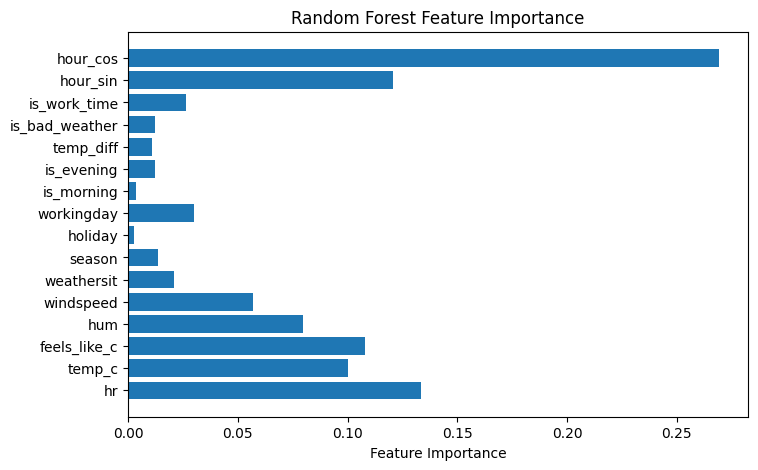

In [113]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()